In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import scipy.stats as stats
from matplotlib.colors import ListedColormap
from scipy.optimize import curve_fit
from scipy.stats import multivariate_normalfrom sklearn.cluster import KMeans

In [5]:
#Reading the dataset
df1= pd.read_csv("pre-owned cars.csv")
df1

,brand,model,transmission,make_year,reg_year,fuel_type,engine_capacity(CC),km_driven,ownership,price,overall_cost,has_insurance,spare_key,reg_number,title
0,Mahindra,Thar LX D 4WD MT CONVERTIBLE,Manual,2020.0,01-01-2021,Diesel,2184.0,11003.0,1st owner,1231000,23431.0,True,No,HR26,2020 Mahindra Thar LX D 4WD MT CONVERTIBLE
1,Hyundai,Verna 1.6 VTVT SX,Manual,2018.0,01-07-2018,Petrol,1591.0,66936.0,1st owner,786000,15359.0,True,No,DL7C,2018 Hyundai Verna 1.6 VTVT SX
2,Tata,Harrier XT PLUS 2.0L KRYOTEC DARK EDITON,Manual,2022.0,01-08-2022,Diesel,1956.0,27990.0,1st owner,1489000,28349.0,True,No,HR29,2022 Tata Harrier XT PLUS 2.0L KRYOTEC DARK ED...
3,Honda,City 1.5L I-VTE V CVT,Automatic,2023.0,01-04-2023,Petrol,1498.0,5061.0,1st owner,1227000,23355.0,True,Yes,DL4C,2023 Honda City 1.5L I-VTE V CVT
4,Ford,Ecosport TITANIUM 1.5L DIESEL,Manual,2021.0,01-07-2021,Diesel,1498.0,23480.0,1st owner,887000,16883.0,True,No,UP14,2021 Ford Ecosport TITANIUM 1.5L DIESEL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2801,Ford,Ecosport TREND + 1.5L PETROL AT,Automatic,2018.0,NaN,Petrol,1497.0,46982.0,1st owner,661000,12920.0,True,Yes,MH03,2018 Ford Ecosport TREND + 1.5L PETROL AT
2802,Honda,Jazz 1.2L I-VTEC V,Manual,2015.0,NaN,Petrol,1199.0,38706.0,2nd owner,412000,8057.0,True,Yes,MH01,2015 Honda Jazz 1.2L I-VTEC V
2803,Hyundai,Elite i20 MAGNA 1.2,Manual,2016.0,NaN,Petrol,1197.0,31405.0,1st owner,496000,9704.0,True,Yes,MH03,2016 Hyundai Elite i20 MAGNA 1.2
2804,Maruti,Baleno DELTA PETROL 1.2,Manual,2017.0,NaN,Petrol,1197.0,47676.0,1st owner,509000,9959.0,True,Yes,MH04,2017 Maruti Baleno DELTA PETROL 1.2


In [8]:
#Data cleaning and processing

#Columns to drop
columns_to_drop = ['reg_year', 'has_insurance', 'spare_key', 'reg_number', 'title']

#Dropping unnecessary columns
df2 = df1.drop(columns=[col for col in columns_to_drop if col in df1.columns])

#Dropping rows with missing values in the important columns
df3 = df2.dropna(subset=['price', 'make_year', 'km_driven'], how='any')

#Checking the resulting DataFrame
print(df3)


         brand                                     model transmission  \
0     Mahindra              Thar LX D 4WD MT CONVERTIBLE       Manual   
1      Hyundai                         Verna 1.6 VTVT SX       Manual   
2         Tata  Harrier XT PLUS 2.0L KRYOTEC DARK EDITON       Manual   
3        Honda                     City 1.5L I-VTE V CVT    Automatic   
4         Ford             Ecosport TITANIUM 1.5L DIESEL       Manual   
...        ...                                       ...          ...   
2800     Honda                                 Brio S MT       Manual   
2801      Ford           Ecosport TREND + 1.5L PETROL AT    Automatic   
2802     Honda                        Jazz 1.2L I-VTEC V       Manual   
2803   Hyundai                       Elite i20 MAGNA 1.2       Manual   
2804    Maruti                   Baleno DELTA PETROL 1.2       Manual   

      make_year fuel_type  engine_capacity(CC)  km_driven  ownership    price  \
0        2020.0    Diesel               21

C:\Users\ranji\AppData\Local\Temp\ipykernel_21908\1098697075.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df3, x='make_year', multiple='stack', palette='Set2', bins=30, ax=axes[0])
C:\Users\ranji\AppData\Local\Temp\ipykernel_21908\1098697075.py:21: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df3, x='engine_capacity(CC)', multiple='stack', palette='Set2', bins=30, ax=axes[1])
C:\Users\ranji\AppData\Local\Temp\ipykernel_21908\1098697075.py:26: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df3, x='km_driven', multiple='stack', palette='Set2', bins=30, ax=axes[2])
C:\Users\ranji\AppData\Local\Temp\ipykernel_21908\1098697075.py:31: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df3, x='price', multiple='stack', palette='Set2', bins=30, ax=axes[3])
C:\Users\ranji\AppData\Local\Temp\

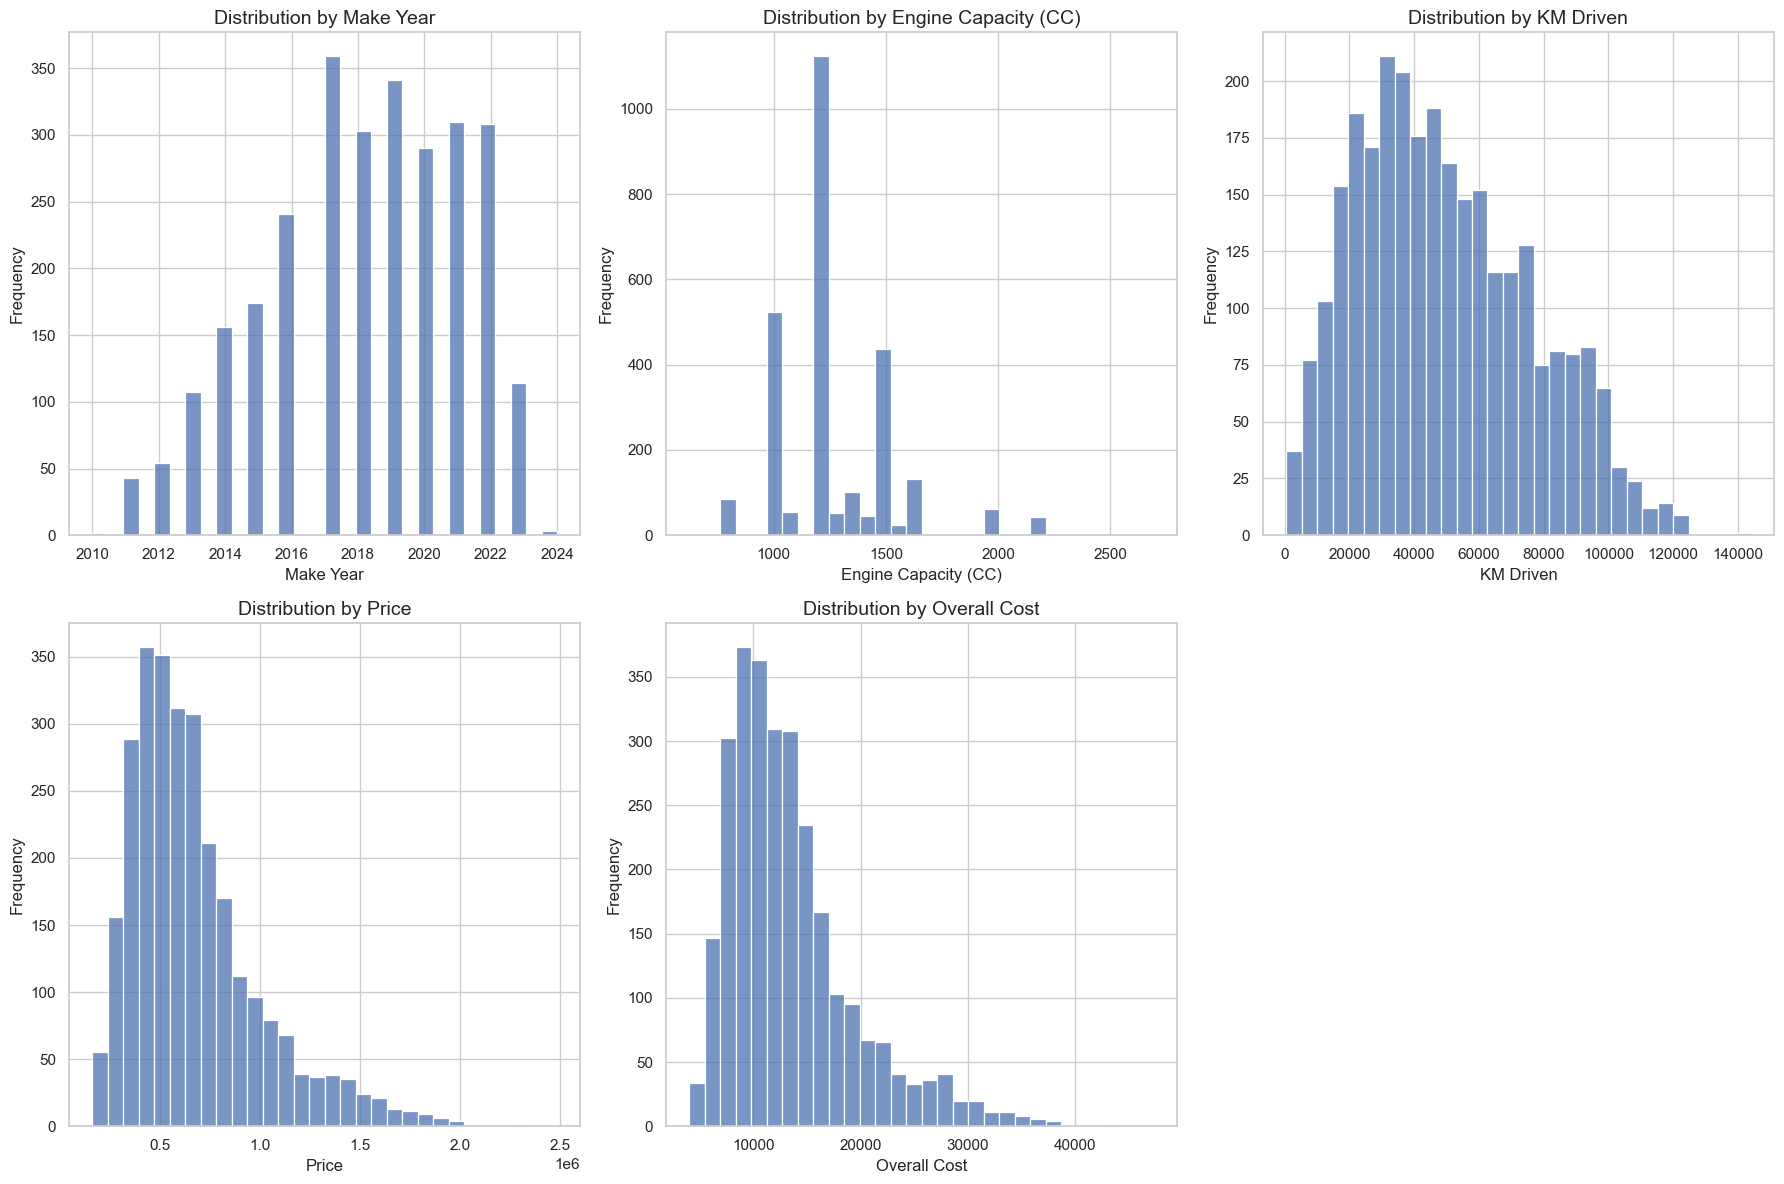

In [47]:
#For categorical graph function

# Setting the style for the plot
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Flattenning axes array for easier indexing
axes = axes.flatten()

# Plotting histogram for each variable
sns.histplot(data=df3, x='make_year', multiple='stack', palette='Set2', bins=30, ax=axes[0])
axes[0].set_title('Distribution by Make Year', fontsize=14)
axes[0].set_xlabel('Make Year', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

sns.histplot(data=df3, x='engine_capacity(CC)', multiple='stack', palette='Set2', bins=30, ax=axes[1])
axes[1].set_title('Distribution by Engine Capacity (CC)', fontsize=14)
axes[1].set_xlabel('Engine Capacity (CC)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)

sns.histplot(data=df3, x='km_driven', multiple='stack', palette='Set2', bins=30, ax=axes[2])
axes[2].set_title('Distribution by KM Driven', fontsize=14)
axes[2].set_xlabel('KM Driven', fontsize=12)
axes[2].set_ylabel('Frequency', fontsize=12)

sns.histplot(data=df3, x='price', multiple='stack', palette='Set2', bins=30, ax=axes[3])
axes[3].set_title('Distribution by Price', fontsize=14)
axes[3].set_xlabel('Price', fontsize=12)
axes[3].set_ylabel('Frequency', fontsize=12)

sns.histplot(data=df3, x='overall_cost', multiple='stack', palette='Set2', bins=30, ax=axes[4])
axes[4].set_title('Distribution by Overall Cost', fontsize=14)
axes[4].set_xlabel('Overall Cost', fontsize=12)
axes[4].set_ylabel('Frequency', fontsize=12)


plt.tight_layout()
plt.show()

In [ ]:
# For Statistical graph 
def analyze_dataframe(df):
    """
    Perform statistical analysis and visualization for a given DataFrame.
    
    """
    #statistics
    describe_df = df.describe()
    mean = df.mean()
    median = df.median()
    std_dev = df.std()
    skewness = df.skew()
    kurtosis = df.kurtosis()
    correlation_matrix = df.corr()

    # Print results
    print("Basic 'describe()' Summary:\n", describe_df)
    print("\nMean:\n", mean)
    print("\nMedian:\n", median)
    print("\nStandard Deviation:\n", std_dev)
    print("\nSkewness:\n", skewness)
    print("\nKurtosis:\n", kurtosis)

    # Visualization
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
    plt.title('Correlation Matrix')
    plt.tight_layout()
    plt.show()

    # Returning results as a dictionary
    return {
        "describe": describe_df,
        "mean": mean,
        "median": median,
        "std_dev": std_dev,
        "skewness": skewness,
        "kurtosis": kurtosis,
        "correlation_matrix": correlation_matrix
    }

Basic 'describe()' Summary:
          make_year  engine_capacity(CC)      km_driven         price  \
count  2805.000000          2688.000000    2805.000000  2.805000e+03   
mean   2018.181105          1259.027530   49215.477362  6.715002e+05   
std       2.945293           254.504798   26626.932696  3.311789e+05   
min    2010.000000           624.000000     450.000000  1.630000e+05   
25%    2016.000000          1194.000000   28540.000000  4.350000e+05   
50%    2018.000000          1197.000000   45695.000000  5.940000e+05   
75%    2021.000000          1462.000000   68182.000000  8.140000e+05   
max    2024.000000          2694.000000  143991.000000  2.487000e+06   

       overall_cost   high_price  
count   2805.000000  2805.000000  
mean   13495.022816     0.499465  
std     6040.809220     0.500089  
min     4039.000000     0.000000  
25%     9267.000000     0.000000  
50%    12145.000000     0.000000  
75%    15760.000000     1.000000  
max    47338.000000     1.000000  

Mean:


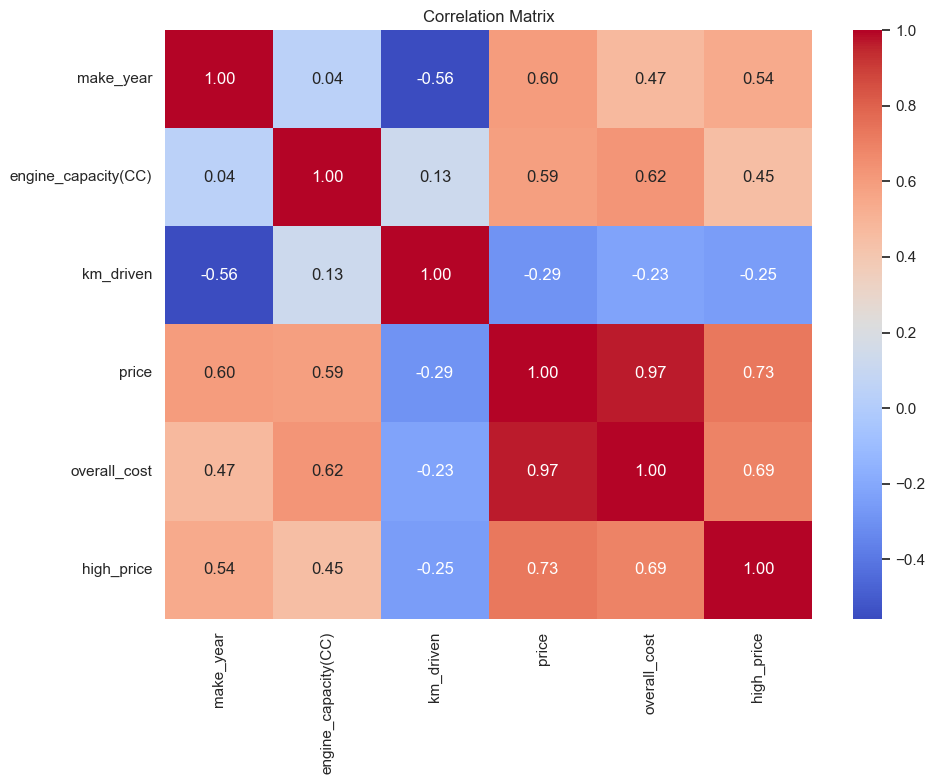

In [48]:
results = analyze_dataframe(df3)
results

In [21]:
# For Fitting
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import multivariate_normal

def plot_logistic_fit(df, target_column, time_column, prediction_years, p0):
    """
    Fits a logistic function to the data and visualizes the results, including predictions and uncertainties.

    """

    def logistic(t, n0, g, t0):
        """Logistic growth function."""
        return n0 / (1 + np.exp(-g * (t - t0)))

    # Preparing data for fitting
    df = df[[time_column, target_column]].dropna()
    numeric_index = (df[time_column] - df[time_column].min()).values

    # Performing logistic regression
    p, cov = curve_fit(logistic, numeric_index, df[target_column], p0=p0)
    sigma = np.sqrt(np.diag(cov))

    # Sample from parameter distribution
    sample_params = multivariate_normal.rvs(mean=p, cov=cov, size=1000)

    # Time range for predictions
    years_predictions = np.arange(df[time_column].min(), max(prediction_years) + 1, 1)
    time_index = years_predictions - df[time_column].min()

    # Predictions and uncertainties
    price_predictions = logistic(time_index, *p)
    price_uncertainties = [
        np.std(logistic(year - df[time_column].min(), *sample_params.T)) for year in years_predictions
    ]

    fig, ax = plt.subplots(dpi=144)
    ax.plot(df[time_column], df[target_column], 'b.', label='Data')
    ax.plot(years_predictions, price_predictions, 'k-', label='Logistic Fit')
    ax.fill_between(
        years_predictions,
        price_predictions - price_uncertainties,
        price_predictions + price_uncertainties,
        color='gray', alpha=0.5, label='Uncertainty'
    )

    ax.set_xlabel('Year')
    ax.set_ylabel(target_column)
    ax.legend()
    plt.title("Logistic Fit with Predictions and Uncertainty")
    plt.tight_layout()
    plt.show()

    # Printing predictions for specific years
    for year in prediction_years:
        predicted_value = logistic(year - df[time_column].min(), *p)
        uncertainty = np.std(logistic(year - df[time_column].min(), *sample_params.T))
        print(f"Predicted {target_column} in {year}: {predicted_value:.2f} ± {uncertainty:.2f}")

N0 (carrying capacity) = 1.8056e+06 ± 335100
g (growth rate) = 0.1709 ± 0.0204
t0 (midpoint year) = 2021.44 ± 2.15
Predicted price in 2025: 1.16906e+06
Predicted price in 2025: 1.16906e+06 ± 66020.8


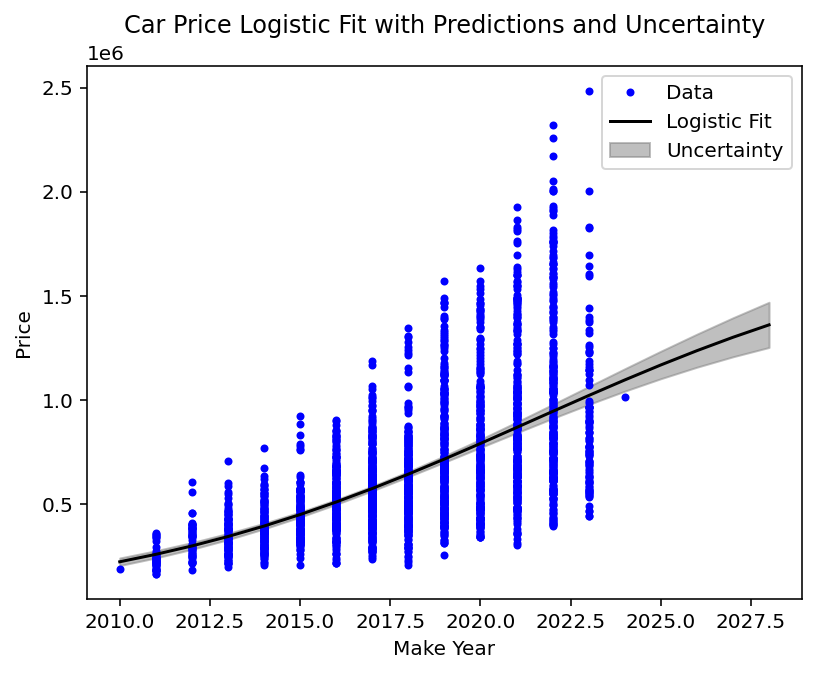

In [32]:
plot_logistic_fit(df=df,target_column='price',time_column='make_year',prediction_years=[2025],p0=(2e6, 0.02, 5))

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

def plot_elbow_method(data, features, cluster_range=(2, 11), random_state=42):
    """
    Creates an Elbow Plot to determine the optimal number of clusters for K-means clustering.

    """
    # Normalizing the selected features
    scaler = MinMaxScaler()
    norm_data = scaler.fit_transform(data[features])

    # Computing WCSS for each cluster count
    wcss = []
    for n in range(cluster_range[0], cluster_range[1]):
        kmeans = KMeans(n_clusters=n, n_init=20, random_state=random_state)
        kmeans.fit(norm_data)
        wcss.append(kmeans.inertia_)

    # Plotting the Elbow Method
    plt.figure(dpi=80, figsize=(8, 6))
    plt.plot(range(cluster_range[0], cluster_range[1]), wcss, marker='o')
    plt.title('Elbow Method', fontsize=16)
    plt.xlabel('Number of Clusters', fontsize=14)
    plt.ylabel('WCSS', fontsize=14)
    plt.tight_layout()
    plt.show()

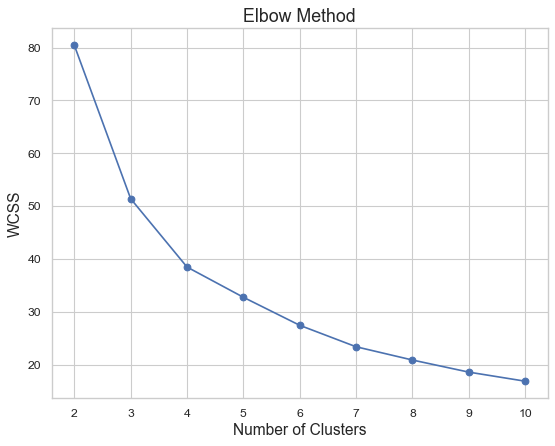

In [58]:
plot_elbow_method(data=df3,features=['price', 'km_driven'],cluster_range=(2, 11),random_state=42)

In [ ]:
#For clustering

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap

def plot_clusters(data, labels, cluster_centers, feature_names):
    """
    Plots clustered data with estimated cluster centers.
    """
    # Creating a color map based on the number of clusters
    num_clusters = len(np.unique(labels))
    colors = plt.cm.Set1(np.linspace(0, 1, num_clusters))
    cmap = ListedColormap(colors)

    fig, ax = plt.subplots(dpi=80, figsize=(8, 6))
    scatter = ax.scatter(
        data[:, 0], data[:, 1], c=labels, cmap=cmap, marker='o', label='Data Points'
    )
    ax.scatter(
        cluster_centers[:, 0],
        cluster_centers[:, 1],
        c='black',
        marker='x',
        s=150,
        label='Cluster Centers'
    )

    # Adding color bar for clusters
    cbar = fig.colorbar(scatter, ax=ax)
    cbar.set_ticks(np.unique(labels))
    cbar.set_label('Cluster Labels')

    ax.set_xlabel(feature_names[0], fontsize=14)
    ax.set_ylabel(feature_names[1], fontsize=14)
    ax.legend()
    plt.title("Clustered Data with KMeans", fontsize=16)
    plt.tight_layout()
    plt.show()

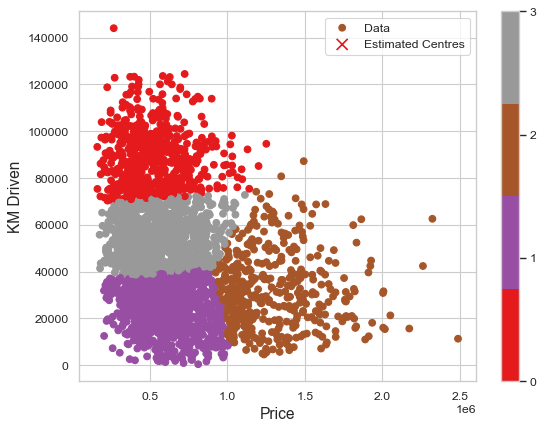

In [57]:
# Normalizing selected features for clustering
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df3[['price', 'km_driven']])

# Performing inverse normalization for original scale
inverse_data = scaler.inverse_transform(normalized_data)

# Applying KMeans clustering
kmeans = KMeans(n_clusters=4, n_init=20, random_state=42)
kmeans.fit(normalized_data)
labels = kmeans.labels_  # Cluster labels
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)  # Cluster centers in original scale

# Plotting the clusters
plot_clusters(
    data=inverse_data,
    labels=labels,
    cluster_centers=cluster_centers,
    feature_names=['Price', 'KM Driven']
)